In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

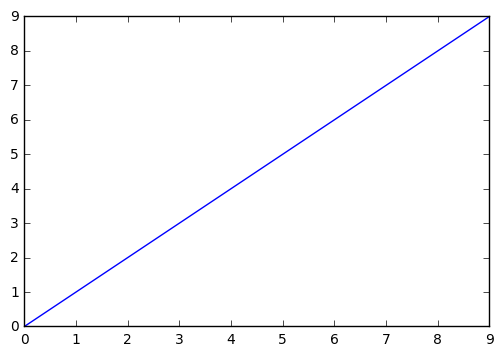

In [2]:
plt.plot(range(10))

In [3]:
2+2

4

In [4]:
import os
os.getcwd()

'/home/martin_muggli/git/readcoloring'

In [5]:
os.chdir('/home/martin_muggli/ncbi_ecoli/metAMOS')

In [6]:
!pwd

/home/martin_muggli/ncbi_ecoli/metAMOS


In [7]:
import subprocess

In [9]:
%%time
initPipeline_stdout = subprocess.check_output('/home/martin_muggli/local/build/metAMOS/initPipeline  -f -m ../simreads7/grinder-reads.fa  -i 800:800', shell=True) #  -i 800:800
initPipeline_stdout

CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 2.31 s


In [203]:
import re
mobj = re.search(r"Project dir " + os.getcwd() + "/(.*) successfully created",
          initPipeline_stdout)
metAMOS_prj = mobj.group(1)


In [204]:
os.environ['PATH'] += ':/home/martin_muggli/local/build/DataAnalysis_2.9_All/packages/opt/454/apps/mapper/bin'

In [205]:
%%time

runPipeline_stdout = subprocess.check_output('which newbler ; /home/martin_muggli/local/build/metAMOS/runPipeline -a newbler -d ' + metAMOS_prj, shell=True)

CPU times: user 92 ms, sys: 132 ms, total: 224 ms
Wall time: 1h 8min 52s


In [206]:
print runPipeline_stdout

/home/martin_muggli/local/build/DataAnalysis_2.9_All/packages/opt/454/apps/mapper/bin/newbler
[Steps to be skipped]:  set(['FindRepeats'])
Starting metAMOS pipeline
Error: cannot find BLAST DB directory, expected it in /home/martin_muggli/local/build/metAMOS/Utilities/DB/. Disabling blastdb dependent programs

[Available RAM: 517 GB]
	*ok
[Available CPUs: 64]
	*ok

________________________________________
Tasks which will be run:

Task = preprocess.Preprocess
Task = assemble.SplitAssemblers
Task = assemble.Assemble
Task = assemble.CheckAsmResults
Task = assemble.SplitMappers
Task = mapreads.MapReads
Task = mapreads.CheckMapResults
Task = mapreads.SplitForORFs
Task = findorfs.FindORFS
Task = validate.Validate
Task = findreps.FindRepeats
Task = annotate.Annotate
Task = fannotate.FunctionalAnnotation
Task = scaffold.Scaffold
Task = findscforfs.FindScaffoldORFS
Task = abundance.Abundance
Task = propagate.Propagate
Task = classify.Classify
Task = postprocess.Postprocess
____________________

In [207]:
os.chdir( metAMOS_prj + "/Postprocess/out")

In [208]:
#os.chdir("in")

In [209]:
!~/local/build/MaryGold-0.2/bnk2gml -b proba.bnk >graph.gml





Read 1184 motifs.
Printed 8631 contigs.
Printed 3952 edges.


In [210]:
!  ~/local/build/MaryGold-0.2/getSeppairs -i graph.gml >seppairs.txt
 

In [211]:
!wc seppairs.txt

 166  166 5516 seppairs.txt


In [212]:
! ~/local/build/MaryGold-0.2/buildMotifs -b proba.bnk -q seppairs.txt


maxIID: 8631
Added 4847 and 4 with orientation N and code: 2 from bank proba.bnk
Added 18 and 339 with orientation N and code: 2 from bank proba.bnk
Added 1838 and 18 with orientation N and code: 2 from bank proba.bnk
Added 5203 and 18 with orientation N and code: 2 from bank proba.bnk
Added 20 and 475 with orientation N and code: 2 from bank proba.bnk
Added 26 and 1948 with orientation N and code: 2 from bank proba.bnk
Added 54 and 380 with orientation N and code: 2 from bank proba.bnk
Added 1411 and 54 with orientation N and code: 2 from bank proba.bnk
Added 4751 and 72 with orientation N and code: 2 from bank proba.bnk
Added 6755 and 72 with orientation N and code: 2 from bank proba.bnk
Added 3509 and 88 with orientation N and code: 2 from bank proba.bnk
Added 109 and 458 with orientation N and code: 2 from bank proba.bnk
Added 5602 and 109 with orientation N and code: 2 from bank proba.bnk
Added 132 and 2081 with orientation N and code: 2 from bank proba.bnk
Added 154 and 1016 with

In [213]:
! LD_LIBRARY_PATH=/home/martin_muggli/local/build/usr/lib64:/home/martin_muggli/local/lib ~/local/build/MaryGold-0.2/printCounts -x ".*NC_011745\.1;.*NZ_CP007149\.1;.*NC_011601\.1" -b proba.bnk >printcounts.stdout 2>&1


In [214]:
!  ~/local/build/MaryGold-0.2/readDepth2member -d readdepths.txt -t '0.2;0.5;1' > membership.txt



In [215]:
 ! ~/local/build/MaryGold-0.2/iid2eid -b proba.bnk/ >iid2eid.txt



In [216]:
! PATH=~/local/build/MaryGold-0.2/:$PATH python ~/local/build/MaryGold-0.2/motiftigger.py -f motifs.txt -d readdepths.txt -m membership.txt -i iid2eid.txt -g compressed.gml -b proba.bnk/ -o linearscaf.txt >motiftigger.stdout 2>&1

In [217]:
!wc linearscaf.txt

 6381  8584 58981 linearscaf.txt


In [218]:
%%time
!pwd

/home/martin_muggli/ncbi_ecoli/metAMOS/P_2016_10_11_183038498760/Postprocess/out
CPU times: user 8 ms, sys: 8 ms, total: 16 ms
Wall time: 121 ms
